In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
requests.__version__
import time
from datetime import datetime


from config import *

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
### Simply outputting all randomly generated coordinates from lat_lngs

# for coordinate in coordinates:
  #  print(coordinate[0], coordinate[1])

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.

#for coordinate in coordinates:
 #   print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, 
    #citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
    #print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [8]:
################ Using API key and calling it
#### look to https://openweathermap.org/current    to access current weather

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

#url ="api.openweathermap.org/data/2.5/weather?q=" + weather_api_key               &APPID

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=5b0f3421babb1bf6c9509f79d5552aa2


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)   

#this will generate a link that will proivide the same output as the line of code below

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=5b0f3421babb1bf6c9509f79d5552aa2&q=Boston


In [11]:
city_url_Boston= requests.get(city_url).json()
print(city_url_Boston)

{'coord': {'lon': -71.0598, 'lat': 42.3584}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}, {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.47, 'feels_like': 23.07, 'temp_min': 22.62, 'temp_max': 30.94, 'pressure': 1013, 'humidity': 92}, 'visibility': 3219, 'wind': {'speed': 3, 'deg': 46, 'gust': 10}, 'rain': {'1h': 0.21}, 'clouds': {'all': 100}, 'dt': 1644008397, 'sys': {'type': 2, 'id': 2013408, 'country': 'US', 'sunrise': 1643975680, 'sunset': 1644012098}, 'timezone': -18000, 'id': 4930956, 'name': 'Boston', 'cod': 200}


In [12]:
# To get a list of Keys from our search would be:
city_Boston_Keys = city_url_Boston.keys()
city_Boston_Keys

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'rain', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [13]:
# To determine the value at eacch Key such as main:

city_url_Boston.get('main')

{'temp': 26.47,
 'feels_like': 23.07,
 'temp_min': 22.62,
 'temp_max': 30.94,
 'pressure': 1013,
 'humidity': 92}

In [14]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Get the text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 26.47,
  'feels_like': 23.07,
  'temp_min': 22.62,
  'temp_max': 30.94,
  'pressure': 1013,
  'humidity': 92},
 'visibility': 3219,
 'wind': {'speed': 3, 'deg': 46, 'gust': 10},
 'rain': {'1h': 0.21},
 'clouds': {'all': 100},
 'dt': 1644008397,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643975680,
  'sunset': 1644012098},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
#### Parse a Response from an API  6.2.5

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 26.47,
  'feels_like': 23.07,
  'temp_min': 22.62,
  'temp_max': 30.94,
  'pressure': 1013,
  'humidity': 92},
 'visibility': 3219,
 'wind': {'speed': 3, 'deg': 46, 'gust': 10},
 'rain': {'1h': 0.21},
 'clouds': {'all': 100},
 'dt': 1644008397,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643975680,
  'sunset': 1644012098},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
# WE're now delving into the dictionary of data in correspondance to 'sys' and cannot access other keys
    # This is different from the dictionary list we found from Boston or city_weather.json() 
    # since its embedded inside the Boston list
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1643975680,
 'sunset': 1644012098}

In [20]:
# We'll now dive into the 'sys' dictionary and access its Keys
boston_data['sys']['country']

'US'

In [21]:
boston_data['dt']

1644008397

In [22]:
# Using similar syntax to get the:
    # time of day, we can get the latitude, longitude, maximum temperature, humidity, percent cloudiness, and wind speed
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 30.94 92 100 3


In [23]:
#### Datetime Conversion
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
# .utcfromtimestamp(date) this chain lets us convert the unicode of date generated from boston_data['dt']
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %I:%M:%S:%p')

# the .strftime('%Y-%m-%d %H:%M:%S') formats the datetime conversion into something more readable
# https://docs.python.org/3.7/library/datetime.html#strftime-and-strptime-behavior

'2022-02-04 08:59:57:PM'

In [24]:
####### Get the City Weather Data 6.2.6

In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(15)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | vryheid
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | itarema
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | shakhovskaya
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | galesong
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | yerbogachen
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | sinnamary
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | roald
Processing Record 39 of Set 4 | seoul
Processing Record 40 of Set 4 | morondava
Processing Record 41 of Set 4 | yelizovo
Processing Record 42 of Set 4 | brae
Processing Record 43 of Set 4 | ribeira grande
Processing Record 44 of Set 4 | yulara
Processing Record 45 of Set 4 | carballo
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | maryville
Processing Record 48 of Set 4 | tanete
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | college
Processing Record 1 of Set 5 | pabna
Processing Record 2 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | fairbanks
Processing Record 6 of Set 5 | mehamn
Processing Record 7 of Set 5 | labuhan
Processing Record 8 of Set 5 | angoche
Processing Record 9 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 10 of Set 5 | mbour
Processing Record 11 of Set 5 

Processing Record 29 of Set 8 | sola
Processing Record 30 of Set 8 | kavaratti
Processing Record 31 of Set 8 | balkanabat
Processing Record 32 of Set 8 | beringovskiy
Processing Record 33 of Set 8 | kosh-agach
Processing Record 34 of Set 8 | ketchikan
Processing Record 35 of Set 8 | foam lake
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | riverton
Processing Record 38 of Set 8 | longyearbyen
Processing Record 39 of Set 8 | santa rosa
Processing Record 40 of Set 8 | baruun-urt
Processing Record 41 of Set 8 | altamont
Processing Record 42 of Set 8 | kaitangata
Processing Record 43 of Set 8 | winnemucca
Processing Record 44 of Set 8 | huarmey
Processing Record 45 of Set 8 | tahoua
Processing Record 46 of Set 8 | tara
Processing Record 47 of Set 8 | qaqortoq
Processing Record 48 of Set 8 | san miguel
Processing Record 49 of Set 8 | coihaique
Processing Record 50 of Set 8 | campbell river
Processing Record 1 of Set 9 | ouadda
Processing Record 2 of Set 9 | 

Processing Record 19 of Set 12 | nurota
Processing Record 20 of Set 12 | dawei
Processing Record 21 of Set 12 | nevers
Processing Record 22 of Set 12 | nkhotakota
Processing Record 23 of Set 12 | calabozo
Processing Record 24 of Set 12 | manokwari
Processing Record 25 of Set 12 | myitkyina
Processing Record 26 of Set 12 | teruel
Processing Record 27 of Set 12 | grenaa
Processing Record 28 of Set 12 | silver city
Processing Record 29 of Set 12 | cabo rojo
Processing Record 30 of Set 12 | tefe
Processing Record 31 of Set 12 | karaul
City not found. Skipping...
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | kasongo-lunda
Processing Record 34 of Set 12 | odweyne
Processing Record 35 of Set 12 | aksu
Processing Record 36 of Set 12 | lufilufi
Processing Record 37 of Set 12 | quchan
Processing Record 38 of Set 12 | anloga
Processing Record 39 of Set 12 | kenai
Processing Record 40 of Set 12 | monte alegre
Processing Record 41 of Set 12 | black river
Processing Reco

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-27.38,68,100,8.05,US,2022-02-04 21:01:03
1,Vryheid,-27.7695,30.7917,61.79,97,100,4.61,ZA,2022-02-04 21:10:53
2,Hobart,-42.8794,147.3294,60.26,85,75,8.05,AU,2022-02-04 20:58:31
3,Georgetown,5.4112,100.3354,79.90,88,20,2.30,MY,2022-02-04 21:00:21
4,Itarema,-2.9248,-39.9167,80.56,75,94,12.73,BR,2022-02-04 21:10:54
5,Souillac,-20.5167,57.5167,80.37,84,100,16.51,MU,2022-02-04 21:04:29
6,Rikitea,-23.1203,-134.9692,78.03,71,9,8.08,PF,2022-02-04 20:58:39
7,Albany,42.6001,-73.9662,24.91,86,100,1.01,US,2022-02-04 21:01:17
8,Shakhovskaya,56.0283,35.5097,8.71,100,100,1.14,RU,2022-02-04 21:10:54
9,Mataura,-46.1927,168.8643,54.48,88,97,1.52,NZ,2022-02-04 20:58:38


In [34]:
# Reorder columns
new_column_order= ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-02-04 21:01:03,71.2906,-156.7887,-27.38,68,100,8.05
1,Vryheid,ZA,2022-02-04 21:10:53,-27.7695,30.7917,61.79,97,100,4.61
2,Hobart,AU,2022-02-04 20:58:31,-42.8794,147.3294,60.26,85,75,8.05
3,Georgetown,MY,2022-02-04 21:00:21,5.4112,100.3354,79.90,88,20,2.30
4,Itarema,BR,2022-02-04 21:10:54,-2.9248,-39.9167,80.56,75,94,12.73
...,...,...,...,...,...,...,...,...,...
568,Pandamatenga,BW,2022-02-04 21:15:28,-18.5278,25.6270,67.96,89,95,4.25
569,Dickson,US,2022-02-04 21:15:26,36.0770,-87.3878,29.34,92,100,1.99
570,Doha,QA,2022-02-04 21:15:28,25.2867,51.5333,66.09,82,0,6.91
571,Chicama,PE,2022-02-04 21:15:28,-7.8447,-79.1469,70.34,60,93,11.68


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
### Plot Latitude vs. Temperature 6.3.1

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%X")
today

'16:19:14'

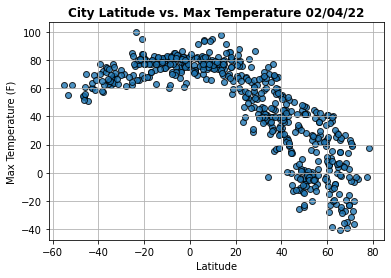

In [42]:
### Plot Latitude vs. Temperature 6.3.1

# Import time module
import time

## Build the scatter plot for Latitude vs. Max Temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"),weight = 'bold')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

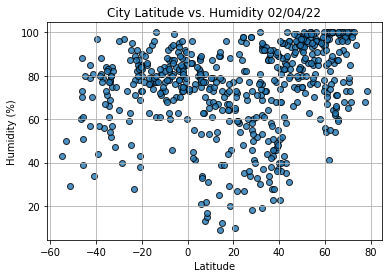

In [43]:
### Build the scatter plots for Latitude vs. Humidity.  6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

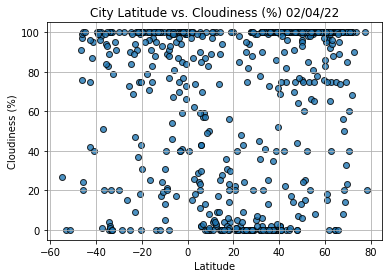

In [44]:
### Plot Latitude vs. Cloudiness 6.3.3

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

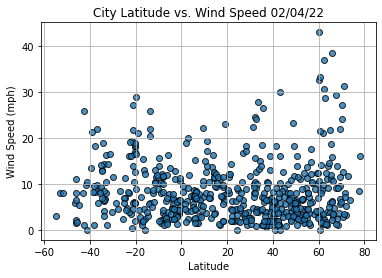

In [45]:
### Plot Latitude vs. Wind Speed  6.3.4

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [48]:
### Use Linear Regression to Find the Relationship Between Variables  6.4.1

## Look to line_Regression_Example.ipynb for full details on line regression and its uses

In [49]:
### Find the Correlation Between Latitude and Maximum Temperature 6.4.2

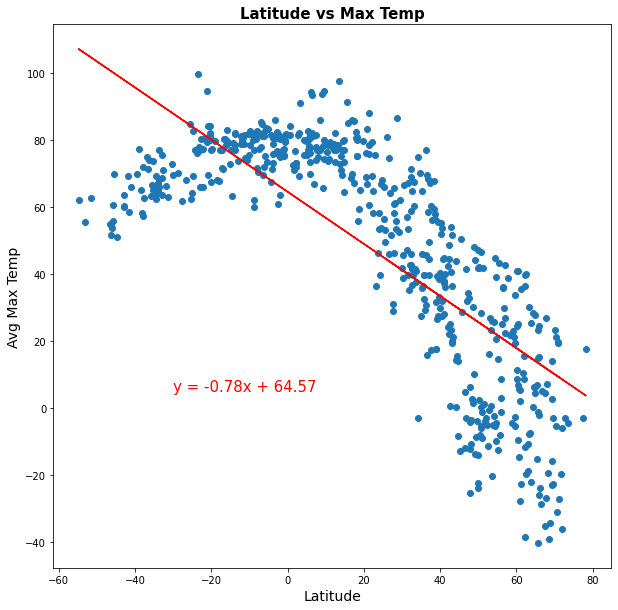

In [125]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title, fontsize=15, weight ='bold')
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.show()
plt.figure(figsize=(10, 10))
plot_linear_regression(lats, max_temps, "Latitude vs Max Temp", "Avg Max Temp",(-30,5))

In [126]:
#simply displaying the 13th city in our randomly generated list
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2022-02-04 21:03:26
Lat                       19.7297
Lng                       -155.09
Max Temp                    79.61
Humidity                       77
Cloudiness                    100
Wind Speed                   8.05
Name: 13, dtype: object

In [127]:
# We'll be creating a data from of hemispheres for northern and southern basd on latitude(Lat)

# To create a West and East hemisphere use same logic but using Longitude(Lng)

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-02-04 21:01:03,71.2906,-156.7887,-27.38,68,100,8.05
3,Georgetown,MY,2022-02-04 21:00:21,5.4112,100.3354,79.90,88,20,2.30
7,Albany,US,2022-02-04 21:01:17,42.6001,-73.9662,24.91,86,100,1.01
8,Shakhovskaya,RU,2022-02-04 21:10:54,56.0283,35.5097,8.71,100,100,1.14
10,Dikson,RU,2022-02-04 21:02:27,73.5069,80.5464,-4.67,94,100,6.42


In [128]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


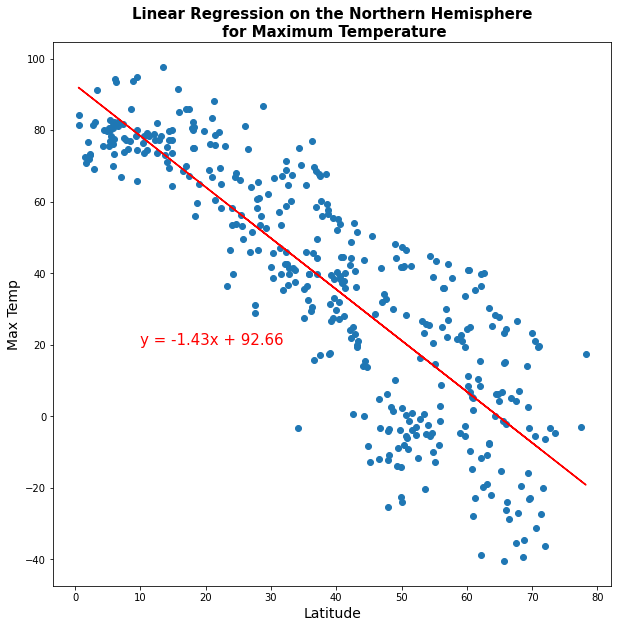

In [129]:
### Find the Correlation Between Latitude and Maximum Temperature  6.4.2
# Linear regression on the Northern Hemisphere by calling on function(def plot_linear_regression)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,20))


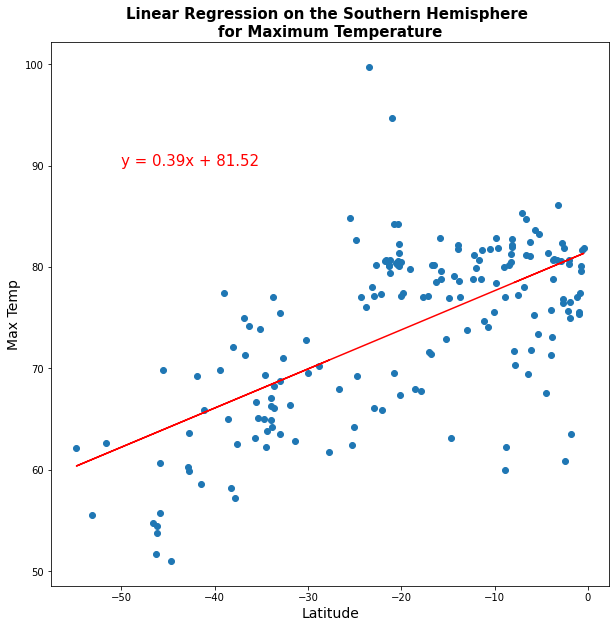

In [130]:
### Find the Correlation Between Latitude and Maximum Temperature  6.4.2
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
### FINDINGS:
# The correlation between the latitude and the maximum temperature is strong to very strong because 
# the r-value is less than –0.7 for the Northern Hemisphere and 
# greater than 0.7 for the Southern Hemisphere, as shown by the plots here.
# This means that as we approach the equator, 0° latitude, the temperatures become warmer.
# And when we are further from the equator the temperatures become cooler. 
# Check the r-values for your plots. 

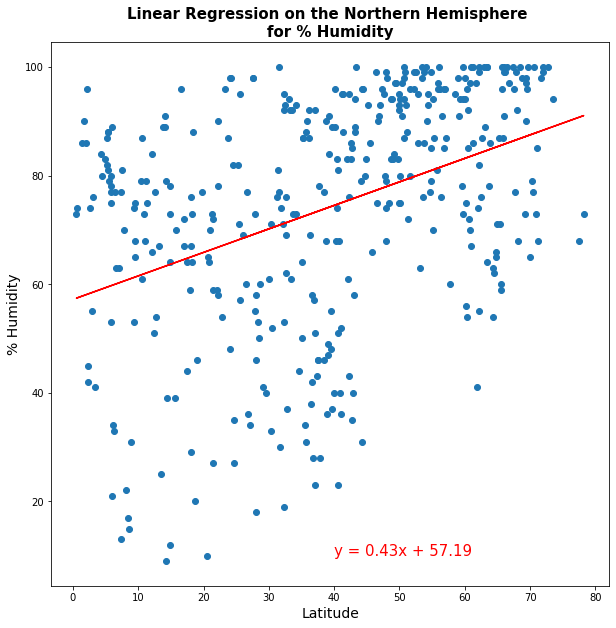

In [131]:
### Find the Correlation Between Latitude and Percent Humidity  6.4.3

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

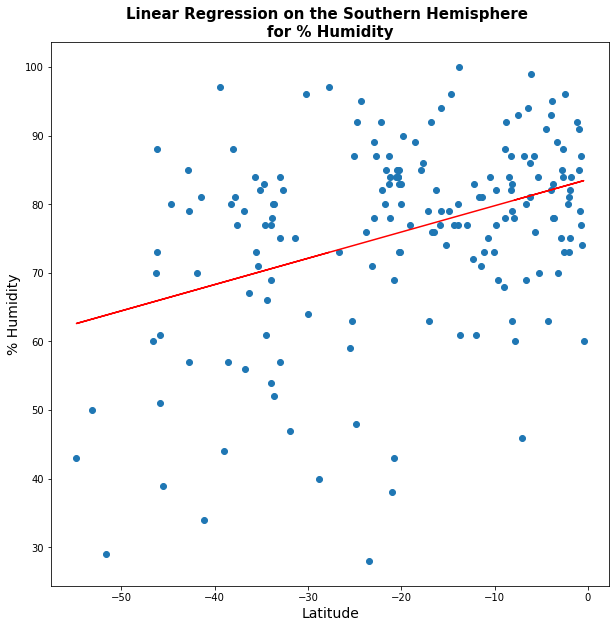

In [132]:
### Find the Correlation Between Latitude and Percent Humidity  6.4.3

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

In [ ]:
### FINDINGS:
# The correlation between the latitude and percent humidity is very low because
# the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here.
# This means that percent humidity is unpredictable due to:
# changing weather patterns that can increase or decrease percent humidity.
# Check the r-values for your plots. 

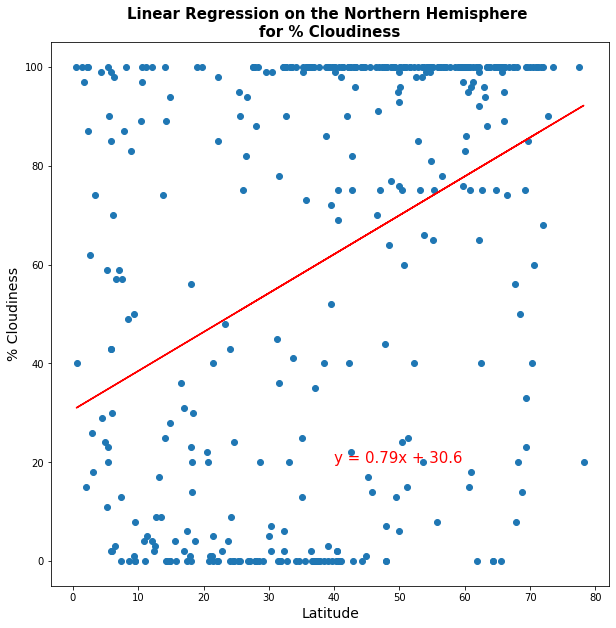

In [134]:
### Find the Correlation Between Latitude and Percent Cloudiness  6.4.4

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,20))

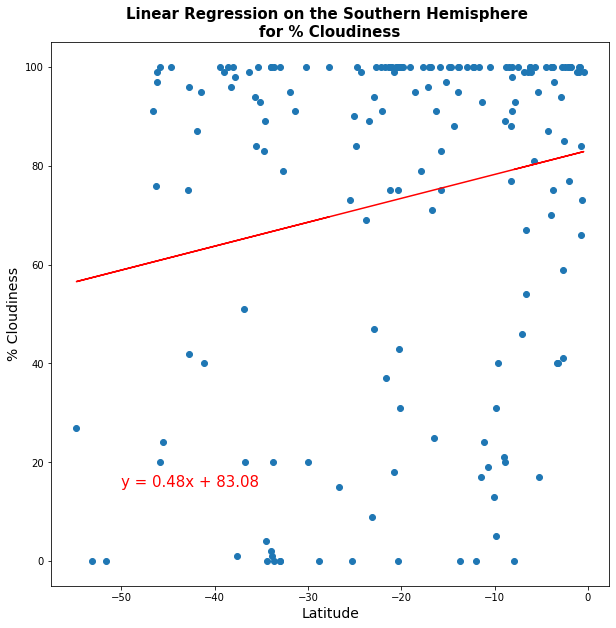

In [136]:
### Find the Correlation Between Latitude and Percent Cloudiness  6.4.4

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

In [137]:
# FINDINGS: 
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere 
# and less than –0.02 for the Southern Hemisphere for the plots shown here. 
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 
#Check the r-values for your plots. 

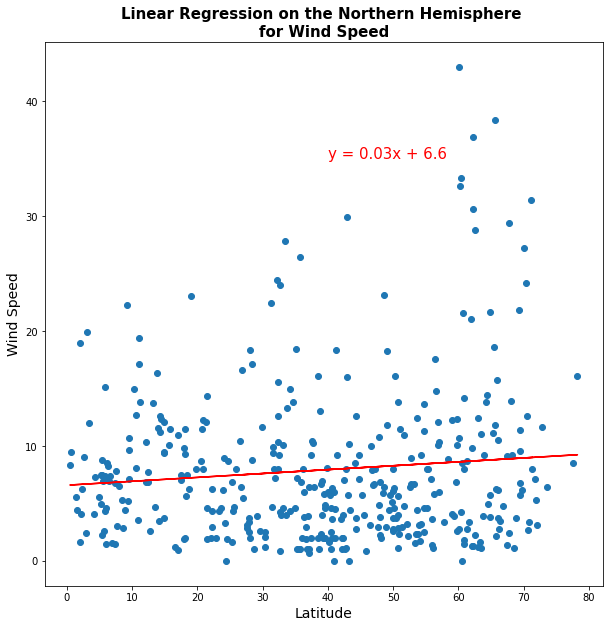

In [140]:
### Find the Correlation Between Latitude and Wind Speed  6.4.5

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

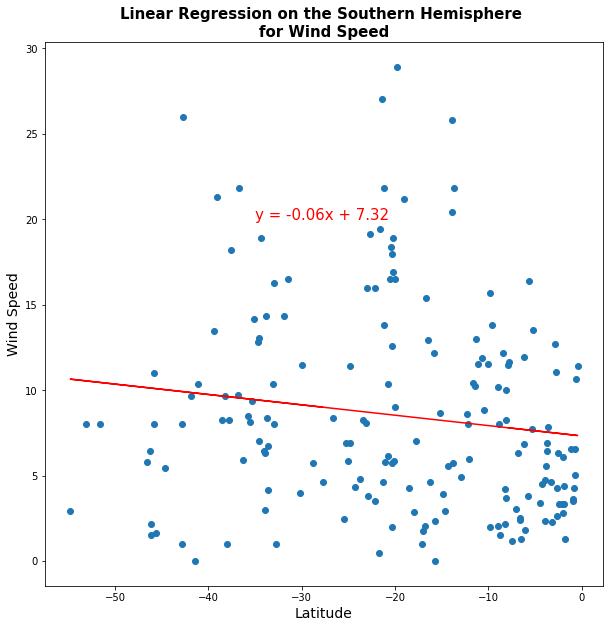

In [151]:
### Find the Correlation Between Latitude and Wind Speed  6.4.5

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.figure(figsize=(10,10))
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-35,20))

In [152]:
### FINDINGS:
# The correlation between the latitude and wind speed is very low because 
# the r-value is less  than –0.07 for the Northern Hemisphere 
# and less than –0.3 for the Southern Hemisphere for the plots shown here. 
# This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
#Check the r-values for your plots. 